In [2]:
import numpy as np
import arepo
import matplotlib.pyplot as plt

In [3]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [4]:
def Jeans(rho, T):
    gamma = 5./3.
    
    XH = 0.76
    mp = 1.672621911E-24
    xe = 0
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    UnitEnergy_in_cgs         = 1.989e+53
    UnitMass_in_g             = 1.989e+43
    
    kB = 1.381E-16
    G = 43018.7
    
    Jeans_length = np.sqrt((5*  kB*T)/(2*np.pi*(gamma-1)*mu*rho*G) / (UnitEnergy_in_cgs/UnitMass_in_g))
    Jeans_mass = (4*np.pi/3.) * rho * Jeans_length**3
    
    return Jeans_length, Jeans_mass

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n

In [5]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

In [7]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

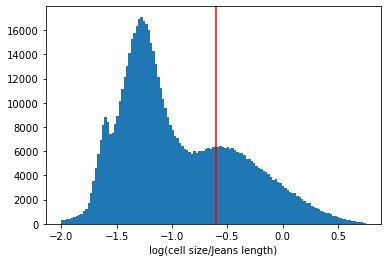

In [29]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = r < 0.1

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)

cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

plt.hist(np.log10(cell_size/L), bins=np.linspace(-2, 0.75, 128));
# plt.yscale('log')
plt.xlabel('log(cell size/Jeans length)')
plt.axvline(np.log10(0.25), c='r')
# plt.title('0 Myr')

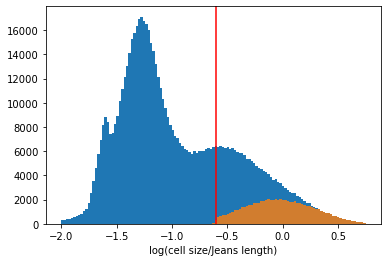

In [32]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = sfr > 0

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)

cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

plt.hist(np.log10(cell_size/L), bins=np.linspace(-2, 0.75, 128),);
plt.hist(np.log10(cell_size[key]/L[key]), bins=np.linspace(-2, 0.75, 128), alpha=0.8);
# plt.yscale('log')
plt.xlabel('log(cell size/Jeans length)')
plt.axvline(np.log10(0.25), c='r')
# plt.title('0 Myr')

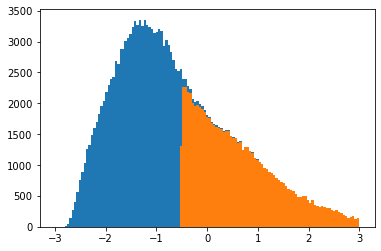

In [37]:
rho = sn.part0.rho.value
key = cell_size/L > 0.25
keySF = np.logical_and(key, sfr > 0)

plt.hist(np.log10(rho[key]), bins=np.linspace(-3, 3, 128));
plt.hist(np.log10(rho[keySF]), bins=np.linspace(-3, 3, 128));


In [38]:
def gaussian(x, mu, sigma):
    prefactor = 1./(sigma * np.sqrt(2*np.pi))
    in_exp = -0.5 * (x-mu)**2/sigma**2
    return prefactor*np.exp(in_exp)
    

Text(0.5, 0, 'derivative of pattern speed')

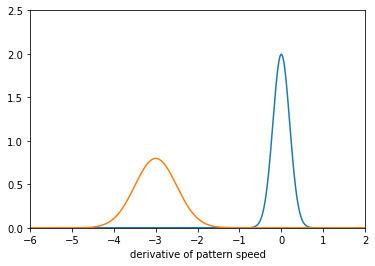

In [48]:
xlist = np.linspace(-6, 2, 1000)
gauss_locked = gaussian(xlist, 0, 0.2)
gauss_unlocked = gaussian(xlist, -3, 0.5)

plt.plot(xlist, gauss_locked)
plt.plot(xlist, gauss_unlocked)

plt.ylim(0, 2.5)
plt.xlim(-6, 2)

plt.xlabel('derivative of pattern speed')


### SFE=1

In [7]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-SFE1/output', 20, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

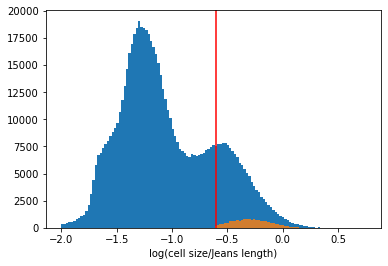

In [8]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = sfr > 0

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)

cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

plt.hist(np.log10(cell_size/L), bins=np.linspace(-2, 0.75, 128),);
plt.hist(np.log10(cell_size[key]/L[key]), bins=np.linspace(-2, 0.75, 128), alpha=0.8);
# plt.yscale('log')
plt.xlabel('log(cell size/Jeans length)')
plt.axvline(np.log10(0.25), c='r')
# plt.title('0 Myr')

In [9]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-novirial/output', 20, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

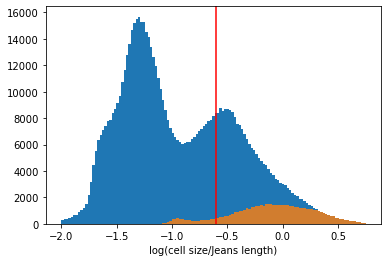

In [107]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = sfr > 0

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)

cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

plt.hist(np.log10(cell_size/L), bins=np.linspace(-2, 0.75, 128),);
plt.hist(np.log10(cell_size[key]/L[key]), bins=np.linspace(-2, 0.75, 128), alpha=0.8);
# plt.yscale('log')
plt.xlabel('log(cell size/Jeans length)')
plt.axvline(np.log10(0.25), c='r')
# plt.title('0 Myr')

In [108]:
np.min(L)*1E3

0.0410197681048885

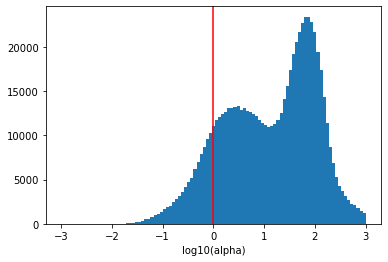

In [18]:
alpha_vir = sn.part0.VirialParameter

plt.hist(np.log10(alpha_vir), bins=np.linspace(-3, 3, 100));
# plt.yscale('log')
plt.xlabel('log10(alpha)')
plt.axvline(np.log10(1), c='r')
# plt.title('0 Myr')

### Comparing densities at lvl4/3

In [6]:
sn4 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4/output', 40, combineFiles=True)
sn3 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 40, combineFiles=True)
sn2 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl2/output', 40, combineFiles=True)


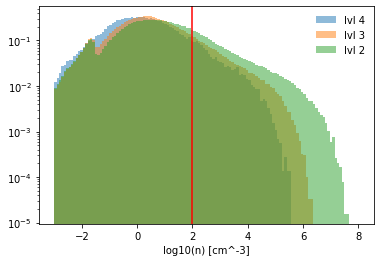

In [10]:
# rho4 = sn4.part0.rho.value
# rho3 = sn3.part0.rho.value
# rho2 = sn2.part0.rho.value

n4 = compute_n(sn4)
n3 = compute_n(sn3)
n2 = compute_n(sn2)

plt.hist(np.log10(n4), bins=np.linspace(-3, 8, 128), alpha=0.5, density=True, label='lvl 4');
plt.hist(np.log10(n3), bins=np.linspace(-3, 8, 128), alpha=0.5, density=True, label='lvl 3');
plt.hist(np.log10(n2), bins=np.linspace(-3, 8, 128), alpha=0.5, density=True, label='lvl 2');
plt.legend(frameon=False)
plt.xlabel('log10(n) [cm^-3]')
plt.yscale('log')
plt.axvline(2, c='r')

In [11]:
n4 = compute_n(sn4)
n3 = compute_n(sn3)
n2 = compute_n(sn2)

print('lvl4 mean n at sfr:', np.mean(n4[sn4.part0.sfr > 0]), 'max n:', np.max(np.log10(n4)))
print('lvl3 mean n at sfr:', np.mean(n3[sn3.part0.sfr > 0]), 'max n:', np.max(np.log10(n3)))
print('lvl2 mean n at sfr:', np.mean(n2[sn2.part0.sfr > 0]), 'max n:', np.max(np.log10(n2)))
# print(np.mean(n3[sn3.part0.sfr > 0]))


lvl4 mean n at sfr: 3500.3738 max n: 5.509075
lvl3 mean n at sfr: 12041.446 max n: 6.3378177
lvl2 mean n at sfr: 110157.516 max n: 7.5795846


In [30]:
snz04 = arepo.Snapshot('/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/phantom-vacuum-Sg20-Rc3.5/lvl4/output', 50, combineFiles=True)
snz03 = arepo.Snapshot('/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/phantom-vacuum-Sg20-Rc3.5/lvl3/output', 50, combineFiles=True)

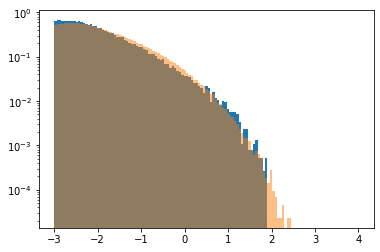

In [34]:
rho4 = snz04.part0.rho.value
rho3 = snz03.part0.rho.value

plt.hist(np.log10(rho4), bins=np.linspace(-3, 4, 128), density=True);
plt.hist(np.log10(rho3), bins=np.linspace(-3, 4, 128), alpha=0.5, density=True);
plt.yscale('log')

In [115]:
sn4 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4-hydrosoft/output', 20, combineFiles=True)
sn3 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-hydrosoft/output', 10, combineFiles=True)

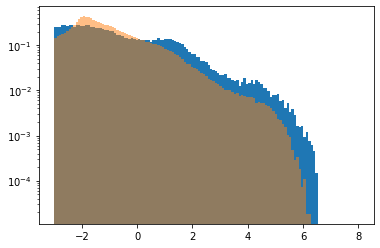

In [119]:
rho4 = sn4.part0.rho.value
rho3 = sn3.part0.rho.value

plt.hist(np.log10(rho4), bins=np.linspace(-3, 8, 128), density=True);
plt.hist(np.log10(rho3), bins=np.linspace(-3, 8, 128), alpha=0.5, density=True);
plt.yscale('log')

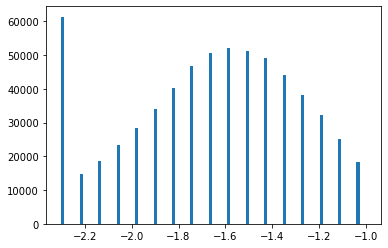

In [50]:
plt.hist(np.log10(sn3.part0.Softenings/2.8), bins=np.linspace(np.log10(0.005), np.log10(0.1), 100));

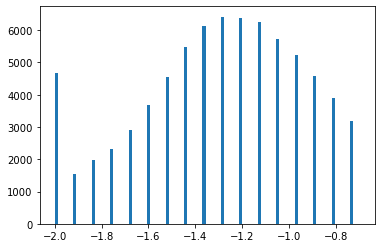

In [51]:
plt.hist(np.log10(sn4.part0.Softenings/2.8), bins=np.linspace(np.log10(0.01), np.log10(0.2), 100));

In [53]:
cell_volume = sn3.part0.mass.value / sn3.part0.rho.value
cell_size = (3/(4*np.pi) * cell_volume)**(1./3.)

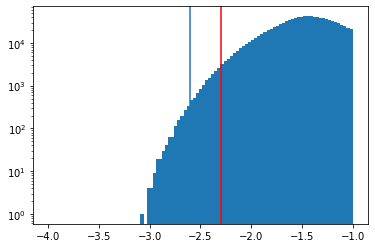

In [102]:
plt.hist(np.log10(2.5*cell_size/2.8), bins=np.linspace(np.log10(0.0001), np.log10(0.1), 100));
plt.yscale('log')
plt.axvline(np.log10(0.005), c='r')
plt.axvline(np.log10(0.0025))

In [67]:
cell_volume = sn4.part0.mass.value / sn4.part0.rho.value
cell_size = (3/(4*np.pi) * cell_volume)**(1./3.)

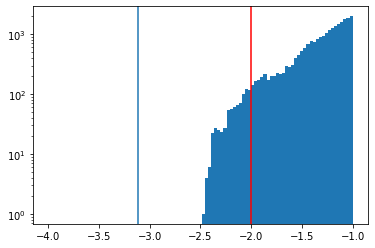

In [70]:
plt.hist(np.log10(2.5*cell_size), bins=np.linspace(np.log10(0.0001), np.log10(0.1), 100));
plt.yscale('log')
plt.axvline(np.log10(0.01), c='r')
plt.axvline(np.log10(0.00038*2))

### Jeans enforced

In [128]:
def Jeans(sn):
    gamma = 5./3.
    
    P = sn.part0.Pressure.value
    rho = sn.part0.rho.value
    
    cssq = gamma * P / rho
    G = 43018.7
    
    LJ = np.sqrt(np.pi * cssq / (G * rho))
    
    cell_volume = sn.part0.mass.value / sn.part0.rho.value
    cell_size = (3/(4*np.pi) * cell_volume)**(1./3.)
    
    return LJ, cell_size

In [126]:
sn4J = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4-Jeans/output', 20, combineFiles=True)
sn3J = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-Jeans/output', 6, combineFiles=True)

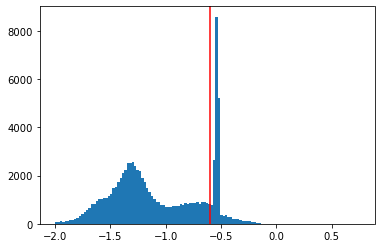

In [94]:
LJ, cell_size = Jeans(sn4J)
plt.hist(np.log10(cell_size/LJ), bins=np.linspace(-2, 0.75, 128));
plt.axvline(np.log10(0.25), c='r')

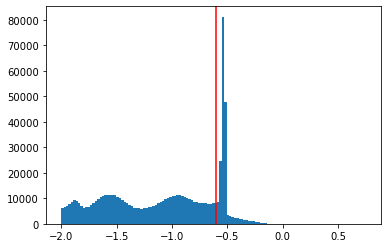

In [95]:
LJ, cell_size = Jeans(sn3J)
plt.hist(np.log10(cell_size/LJ), bins=np.linspace(-2, 0.75, 128));
plt.axvline(np.log10(0.25), c='r')

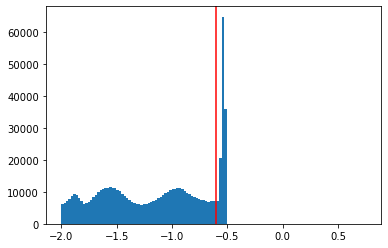

In [130]:
LJ, cell_size = Jeans(sn3J)
plt.hist(np.log10(cell_size/LJ)[sn3J.part0.sfr == 0], bins=np.linspace(-2, 0.75, 128));
plt.axvline(np.log10(0.25), c='r')

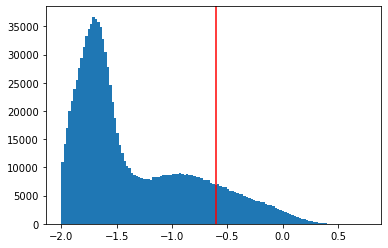

In [98]:
LJ, cell_size = Jeans(snz03)
plt.hist(np.log10(cell_size/LJ), bins=np.linspace(-2, 0.75, 128));
plt.axvline(np.log10(0.25), c='r')

In [109]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

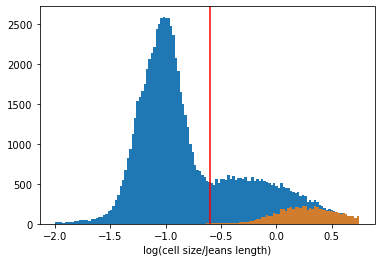

In [110]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = sfr > 0

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)

cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

plt.hist(np.log10(cell_size/L), bins=np.linspace(-2, 0.75, 128),);
plt.hist(np.log10(cell_size[key]/L[key]), bins=np.linspace(-2, 0.75, 128), alpha=0.8);
# plt.yscale('log')
plt.xlabel('log(cell size/Jeans length)')
plt.axvline(np.log10(0.25), c='r')
# plt.title('0 Myr')

In [111]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

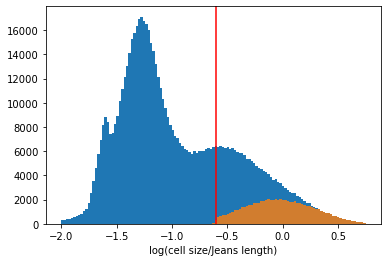

In [112]:
pos = sn.part0.pos.value - center
vel = sn.part0.vel.value
acc = sn.part0.acce
mass = sn.part0.mass.value
sfr = sn.part0.sfr.value

r = np.linalg.norm(pos, axis=1)
R = np.linalg.norm(pos[:,:2], axis=1)
phi = np.arctan2(pos[:,1], pos[:,0])

key = sfr > 0

T = compute_T(sn)
L, M = Jeans(sn.part0.rho.value, T)

cell_volume = sn.part0.mass.value / sn.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

plt.hist(np.log10(cell_size/L), bins=np.linspace(-2, 0.75, 128),);
plt.hist(np.log10(cell_size[key]/L[key]), bins=np.linspace(-2, 0.75, 128), alpha=0.8);
# plt.yscale('log')
plt.xlabel('log(cell size/Jeans length)')
plt.axvline(np.log10(0.25), c='r')
# plt.title('0 Myr')

In [142]:
snSFE = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-SFE1/output', 20, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

In [143]:
n = compute_n(snSFE)
T = compute_T(snSFE)
print(np.log10(np.max(n)))

4.7194424


In [148]:
sn = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)
center = sn.part1.pos.value[np.argmin(sn.part1.pot)]

In [149]:
n = compute_n(sn)
T = compute_T(sn)
print(np.log10(np.max(n)))

7.040558


In [150]:
print(sn.part0.pos.value[np.argmax(n)])

[50.15698182 50.57048942 50.03444616]


In [218]:
pos_nmax = sn.part0.pos.value[np.argmax(n)]
rdiff = np.linalg.norm(sn.part0.pos.value - pos_nmax, axis=1)
key = rdiff < 0.1
print(len(np.where(key)[0]))

2734


In [219]:
UnitMass_in_g = 1.989e+43
UnitVelocity_in_cm_per_s = 100000
UnitTime_in_s = 3.08568e+16
SOLAR_MASS = 1.989e33
SEC_PER_YEAR = 3.15576e7

In [220]:
Mg = np.sum(sn.part0.mass[key])
sfr = np.sum(sn.part0.sfr[key])
sfr_cu = sfr / ((UnitMass_in_g / SOLAR_MASS) / (UnitTime_in_s / SEC_PER_YEAR))

print(sfr)
print(Mg*1E10)
print(Mg/sfr_cu)

1.0005031
22929324.76848364
0.023438290055941037


In [221]:
rdiff4 = np.linalg.norm(sn.part4.pos.value - pos_nmax, axis=1)
key4 = rdiff4 < 0.1
print(len(np.where(key4)[0]))
print(np.sum(sn.part4.mass[key4])*1E10/1E5)

833
57.997298426926136


In [222]:
print(np.sum(sn.part4.mass[key4])/Mg)

0.2529394


<ipython-input-216-0e4d8e020221>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.hist(sn.part0.mass[key]/sfr_cu, bins=np.linspace(0, 0.02, 64));


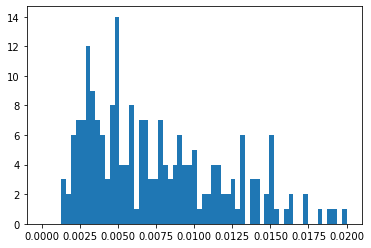

In [216]:
sfr_cu = sn.part0.sfr[key] / ((UnitMass_in_g / SOLAR_MASS) / (UnitTime_in_s / SEC_PER_YEAR))
prob = 1-np.exp(sfr_cu * 0.001/sn.part0.mass[key])
plt.hist(sn.part0.mass[key]/sfr_cu, bins=np.linspace(0, 0.02, 64));
# plt.yscale('log')

In [204]:
dir(sn.part0)

['Acceleration',
 'CoolingHeatingEnergy',
 'Coordinates',
 'Density',
 'ElectronAbundance',
 'GFM_CoolingRate',
 'GFM_Metallicity',
 'GFM_Metals',
 'GasRadCoolShutoffTime',
 'InternalEnergy',
 'Masses',
 'MolecularHFrac',
 'NeutralHydrogenAbundance',
 'ParticleIDs',
 'Potential',
 'Pressure',
 'Softenings',
 'StarFormationRate',
 'Velocities',
 'VirialParameter',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_num',
 '_parent',
 'acce',
 'cohe',
 'data',
 'gcol',
 'gmet',
 'gz',
 'hmol',
 'id',
 'mass',
 'ne',
 'nh',
 'pos',
 'pot',
 'pres',
 'rfcg',
 'rho',
 'sfr',
 'soft',
 'u',
 'vel']

### Softening neighbor

In [14]:
from scipy.spatial import KDTree

In [12]:
sn4 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4/output', 40, combineFiles=True)
sn3 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 40, combineFiles=True)
sn2 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl2/output', 40, combineFiles=True)

In [13]:
V4 = sn4.part0.mass.value / sn4.part0.rho.value
dx4 = (V4 * (3/(4*np.pi)))**(1/3.)

V3 = sn3.part0.mass.value / sn3.part0.rho.value
dx3 = (V3 * (3/(4*np.pi)))**(1/3.)

V2 = sn2.part0.mass.value / sn2.part0.rho.value
dx2 = (V2 * (3/(4*np.pi)))**(1/3.)

In [15]:
tree4 = KDTree(sn4.part0.pos.value)
tree3 = KDTree(sn3.part0.pos.value)
tree2 = KDTree(sn2.part0.pos.value)

In [16]:
%time r4, treekey4 = tree4.query(sn4.part0.pos.value, k=32)
%time r3, treekey3 = tree3.query(sn3.part0.pos.value, k=32)
%time r2, treekey2 = tree2.query(sn2.part0.pos.value, k=32)

CPU times: user 570 ms, sys: 6.22 ms, total: 577 ms
Wall time: 576 ms
CPU times: user 4.39 s, sys: 88.6 ms, total: 4.48 s
Wall time: 4.49 s
CPU times: user 4.85 s, sys: 111 ms, total: 4.96 s
Wall time: 4.97 s


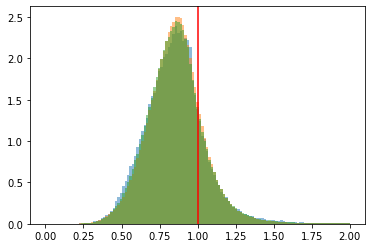

In [26]:
plt.hist(r4[:,-1]/(3.5*dx4), bins=np.linspace(0, 2, 128), alpha=0.5, density=True, label='lvl 4');
plt.hist(r3[:,-1]/(3.5*dx3), bins=np.linspace(0, 2, 128), alpha=0.5, density=True, label='lvl 3');
plt.hist(r2[:,-1]/(3.5*dx2), bins=np.linspace(0, 2, 128), alpha=0.5, density=True, label='lvl 2');

plt.axvline(1, c='r')

In [28]:
n4 = compute_n(sn4)
n3 = compute_n(sn3)
n2 = compute_n(sn2)

key4 = np.argmin(np.abs(n4 - 3400))
key3 = np.argmin(np.abs(n3 - 3400))
key2 = np.argmin(np.abs(n2 - 3400))

print(2.5*dx4[key4])
print(2.5*dx3[key3])
print(2.5*dx2[key2])


0.015709337312728167
0.00804977142252028
0.0058397866087034345


### dev

In [29]:
sn4 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4/output', 50, combineFiles=True)
sn3 = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3/output', 50, combineFiles=True)

sn4dev = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl4-raddev/output', 50, combineFiles=True)
sn3dev = arepo.Snapshot(basepath + 'runs/MW3iso_fg0.5/lvl3-raddev/output', 50, combineFiles=True)

In [34]:
dir(sn.part4)

['Acceleration',
 'BirthDensity',
 'BirthPos',
 'BirthVel',
 'ColumnDensity',
 'Coordinates',
 'CumFeedbackMomentum',
 'CumInjFeedbackMomentum',
 'CumInjFeedbackMomentumAGB',
 'CumSNIINumber',
 'CumSNIaNumber',
 'Cum_RadMomentumRealInjected',
 'Cum_RadiationMomentumReleased',
 'FeedbackEnergy',
 'FeedbackMomentum',
 'FeedbackMomentumAGB',
 'GFM_InitialMass',
 'GFM_Metallicity',
 'GFM_Metals',
 'GFM_StellarFormationTime',
 'LocISMDens',
 'MassReleased',
 'Masses',
 'NormSphRadFeedback',
 'ParticleIDs',
 'Potential',
 'RadCoolShutoffTime',
 'RadFeedTau',
 'RadFeed_NumNgb',
 'RadiationMomentumReleased',
 'SNIINumber',
 'SNIaNumber',
 'Softenings',
 'StarsHsml',
 'StarsMaxRadius',
 'StromgrenRadius',
 'Velocities',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__'

In [44]:
def print_feedback(sn):
    for key in ['CumFeedbackMomentum',
                'CumInjFeedbackMomentum',
                'CumInjFeedbackMomentumAGB',
                'CumSNIINumber',
                'CumSNIaNumber',
                'Cum_RadMomentumRealInjected',
                'Cum_RadiationMomentumReleased',
                'FeedbackEnergy',
                'FeedbackMomentum',
                'FeedbackMomentumAGB',
                'RadiationMomentumReleased']:
    
        val = getattr(sn.part4, key)
        print(key, np.sum(val))
    

In [45]:
print_feedback(sn4)

CumFeedbackMomentum 0.0
CumInjFeedbackMomentum 0.0
CumInjFeedbackMomentumAGB 0.0
CumSNIINumber 9935045.0
CumSNIaNumber 228014.0
Cum_RadMomentumRealInjected 0.0
Cum_RadiationMomentumReleased 8.93371
FeedbackEnergy 0.0
FeedbackMomentum 0.0
FeedbackMomentumAGB 0.0
RadiationMomentumReleased 0.0014058695


In [46]:
print_feedback(sn4dev)

CumFeedbackMomentum 0.0
CumInjFeedbackMomentum 0.0
CumInjFeedbackMomentumAGB 0.0
CumSNIINumber 9754344.0
CumSNIaNumber 224360.0
Cum_RadMomentumRealInjected 0.0
Cum_RadiationMomentumReleased 8.759188
FeedbackEnergy 0.0
FeedbackMomentum 0.0
FeedbackMomentumAGB 0.0
RadiationMomentumReleased 0.0015767568


In [47]:
print_feedback(sn3)

CumFeedbackMomentum 0.0
CumInjFeedbackMomentum 0.0
CumInjFeedbackMomentumAGB 0.0
CumSNIINumber 16223952.0
CumSNIaNumber 353359.0
Cum_RadMomentumRealInjected 0.0
Cum_RadiationMomentumReleased 14.93961
FeedbackEnergy 0.0
FeedbackMomentum 0.0
FeedbackMomentumAGB 0.0
RadiationMomentumReleased 0.010303579


In [48]:
print_feedback(sn3dev)

CumFeedbackMomentum 0.0
CumInjFeedbackMomentum 0.0
CumInjFeedbackMomentumAGB 0.0
CumSNIINumber 17168928.0
CumSNIaNumber 373433.0
Cum_RadMomentumRealInjected 0.0
Cum_RadiationMomentumReleased 15.749003
FeedbackEnergy 0.0
FeedbackMomentum 0.0
FeedbackMomentumAGB 0.0
RadiationMomentumReleased 0.011782921


In [49]:
sn3

snapshot /n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/runs/MW3iso_fg0.5/lvl3/output/snapdir_050/snapshot_050.0.hdf5

In [53]:
from scipy.stats import binned_statistic_2d
import matplotlib as mpl

In [58]:
from numba import njit
from scipy.spatial import KDTree

In [59]:
nres = 1024

@njit
def create_plot_pos(x, y, nres):
    plot_pos = np.zeros((nres*nres, 3))
    for i in range(len(x)):
        for j in range(len(y)):
            plot_pos[i*nres + j][0]=x[i][0]
            plot_pos[i*nres + j][2]=y[0][j]

    return plot_pos

x, z = np.meshgrid(np.linspace(-8, 8, nres), np.linspace(-8, 8, nres), indexing='ij')
plot_pos = create_plot_pos(x, z, nres)

In [61]:
pos = sn3.part0.pos.value
sfrmass = sn3.part0.mass.value * sn3.part0.sfr

tree = KDTree(pos)
_, key = tree.query(plot_pos)

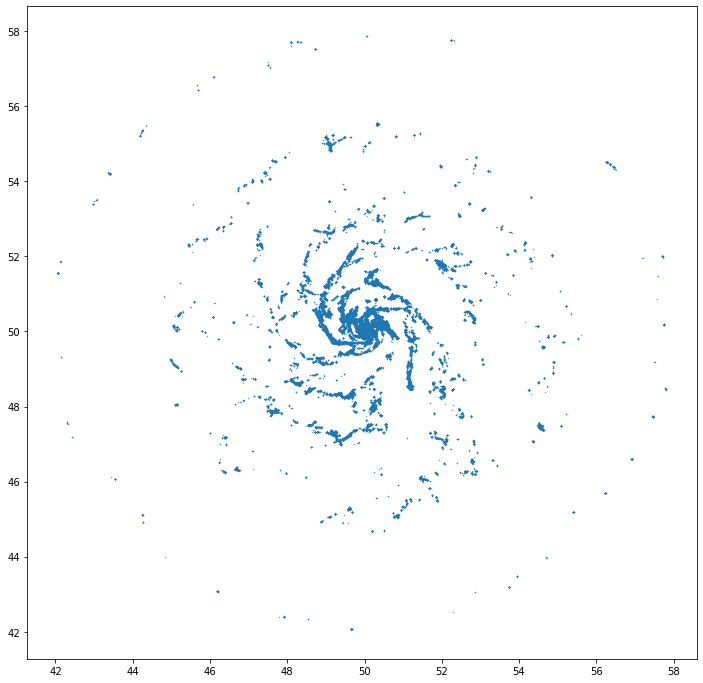

In [69]:
pos = sn3.part0.pos.value
sfrmass = sn3.part0.mass.value * sn3.part0.sfr

key = sfrmass > 0
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(pos[:,0][key], pos[:,1][key], s=0.1)

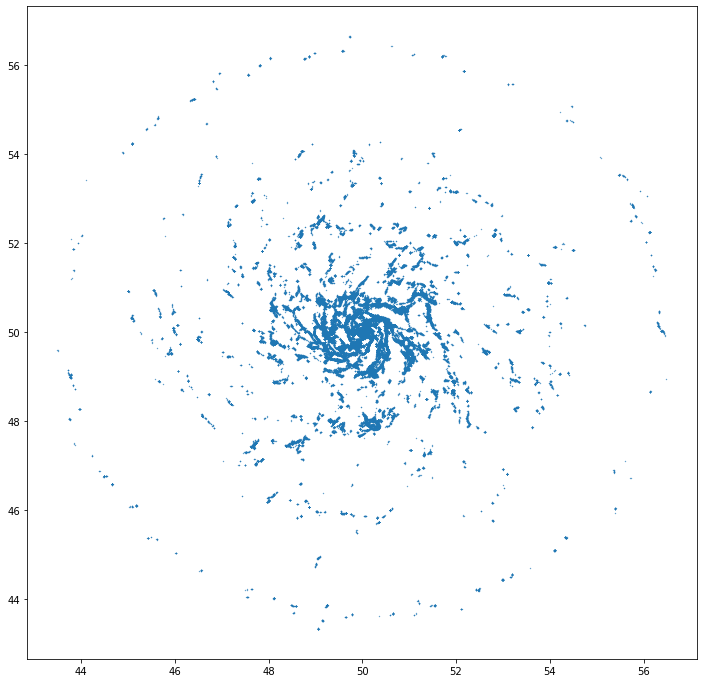

In [70]:
pos = sn2.part0.pos.value
sfrmass = sn2.part0.mass.value * sn2.part0.sfr

key = sfrmass > 0
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(pos[:,0][key], pos[:,1][key], s=0.1)